## Library Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf
import seaborn as sns

In [ ]:
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from google.colab.patches import cv2_imshow

## Inisiasi Data

In [ ]:
# Get and extract file Extract
source_path = '/content/drive/MyDrive/Skripsi/dataset/training.zip'
dataset_path = "/content/datasets/"

from zipfile import ZipFile

zf = ZipFile(source_path)
zf.extractall(dataset_path)
zf.close()


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
mlb = MultiLabelBinarizer()
mlb.fit(labels)
mlb.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

In [ ]:
data_dir = 'datasets/training'
target_size = (64,64)
classes = 26
batch_size = 32
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range=0.1,
                                   horizontal_flip=False,
                                   validation_split=0.2)

train_gen = train_datagen.flow_from_directory(data_dir, target_size=target_size,
                                             shuffle=True,
                                             batch_size= batch_size,
                                             color_mode='grayscale',
                                             class_mode='categorical',
                                             subset='training')

val_gen = train_datagen.flow_from_directory(data_dir, target_size=target_size,
                                             batch_size= batch_size,
                                             color_mode='grayscale',
                                             class_mode='categorical',
                                             subset='validation')

Found 2080 images belonging to 26 classes.
Found 520 images belonging to 26 classes.


In [ ]:
epoch = 50
train_size = len(train_gen)
steps_per_epoch = 32
validation_steps = 9

(64, 64, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0.]


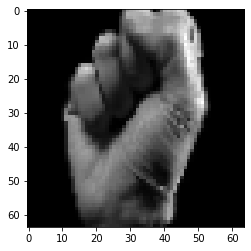

(64, 64, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


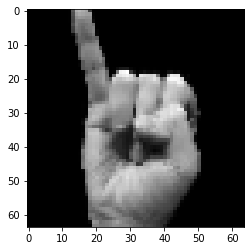

(64, 64, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


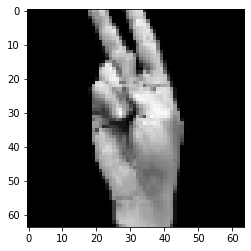

In [ ]:
x,y = train_gen.next()
for i in range(0,3):
    image = x[i]
    label = y[i]
    print(x[i].shape)
    print (label)
    plt.imshow(image[:,:,0], cmap='gray')
    plt.show()

## Membuat Model

Inisialisasi CNN

In [ ]:
def CNN():
  #inisiasi CNN
  model = Sequential()

  #Convolution dan Max Pooling
  model.add(Conv2D(32, (3, 3), input_shape=(64,64,1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))  # 2x2 is optimal
  
  model.add(Dropout(0.5))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Dropout(0.5))
  model.add(Conv2D(256, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  #Flattening 
  model.add(Flatten())

  #Dense atau Full Connection
  model.add(Dropout(0.5))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units = 26, activation = 'softmax'))
  
  return model

In [ ]:
SibiKlasifikasi = CNN()

In [ ]:
#Optimizer

SibiKlasifikasi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

SibiKlasifikasi.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       7

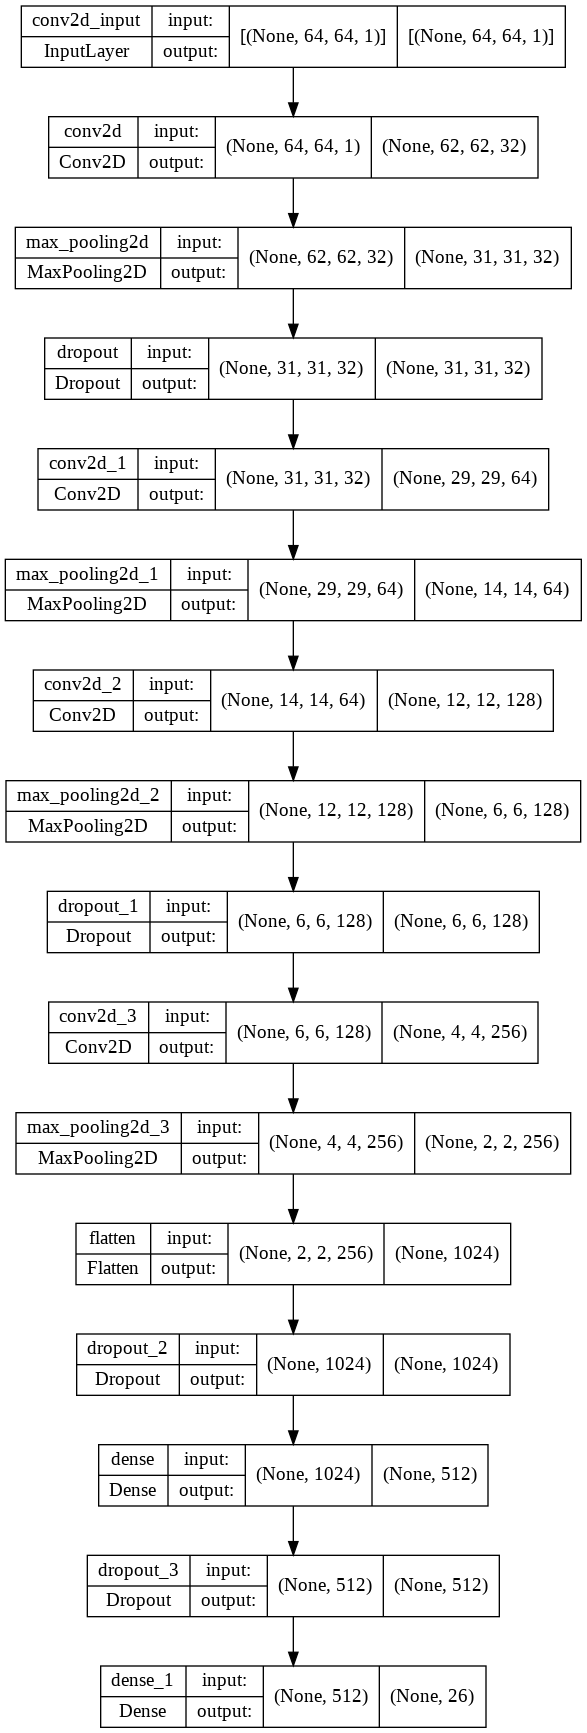

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(SibiKlasifikasi, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Train Model

In [ ]:
history = SibiKlasifikasi.fit(train_gen,
                         steps_per_epoch = steps_per_epoch,
                         epochs = epoch,
                         validation_data = val_gen,
                         validation_steps = validation_steps)

Epoch 1/50
32/32 [==============================] - 37s 1s/step - loss: 3.2838 - accuracy: 0.0322 - val_loss: 3.2573 - val_accuracy: 0.0451
Epoch 2/50
32/32 [==============================] - 29s 932ms/step - loss: 3.2581 - accuracy: 0.0479 - val_loss: 3.2541 - val_accuracy: 0.0660
Epoch 3/50
32/32 [==============================] - 31s 963ms/step - loss: 3.2239 - accuracy: 0.0674 - val_loss: 3.1646 - val_accuracy: 0.0938
Epoch 4/50
32/32 [==============================] - 30s 950ms/step - loss: 2.8533 - accuracy: 0.1553 - val_loss: 2.5605 - val_accuracy: 0.2604
Epoch 5/50
32/32 [==============================] - 31s 978ms/step - loss: 2.2698 - accuracy: 0.2861 - val_loss: 2.2990 - val_accuracy: 0.3056
Epoch 6/50
32/32 [==============================] - 28s 869ms/step - loss: 1.8936 - accuracy: 0.4092 - val_loss: 1.9758 - val_accuracy: 0.4306
Epoch 7/50
32/32 [==============================] - 31s 977ms/step - loss: 1.7099 - accuracy: 0.4463 - val_loss: 1.9148 - val_accuracy: 0.4028
Ep

## Save Model

In [ ]:
SibiKlasifikasi.save('model_sign_e50.h5')

In [ ]:
# Save model to drive

import pytz
import shutil
 
model_path = '/content/drive/MyDrive/Skripsi/model'
shutil.copy( "model_sign_e50.h5", os.path.join(model_path, "e50.h5"))

'/content/drive/MyDrive/Skripsi/model/e50.h5'

## Evaluate Model

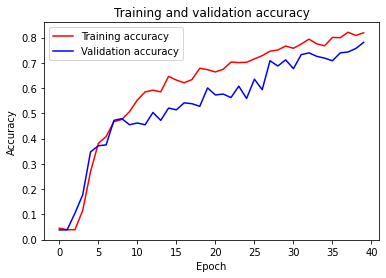

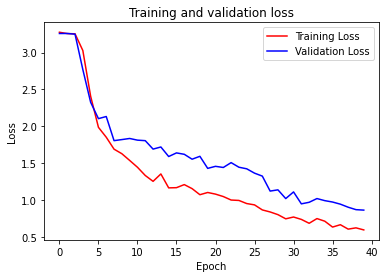

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Testing Model

In [ ]:
#Extract Zip

source_path = '/content/drive/MyDrive/Skripsi/dataset/testingv3.zip'
dataset_path = "/content/datasets/"

from zipfile import ZipFile

zf = ZipFile(source_path)
zf.extractall(dataset_path)
zf.close()

In [ ]:
dataset_path = "/content/datasets/"

In [ ]:
def getLabel(label, model_label):
  for i, x in enumerate(model_label):
    if x >= 0.6:
      return label[i]
    else :
      return ("Gambar bukan abjad SIBI")

In [ ]:
import shutil
 
model_path = '/content/drive/MyDrive/Skripsi/model'
shutil.copy(os.path.join(model_path, "e60.h5"), "model_sign_e60.h5")

In [ ]:
SibiKlasifikasi = CNN()
SibiKlasifikasi.load_weights("model_sign_e60.h5")

In [ ]:
SibiKlasifikasi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

SibiKlasifikasi.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 128)      

In [ ]:
!rm -rf datasets/testingv3/.ipynb_checkpoints

In [ ]:
dataset_path = "/content/datasets/testingv3" 
dir_list = os.listdir(dataset_path)
  
print("Files and directories in '", dataset_path, "' :") 
print(dir_list)

Files and directories in ' /content/datasets/testingv3 ' :
['C (2).jpg', 'M (1).jpg', 'B (2).jpg', 'U (3).jpg', 'I (1).jpg', 'S (1).jpg', 'H (2).jpg', 'X (1).jpg', 'M (3).jpg', 'P (4).jpg', 'O (2).jpg', 'E (3).jpg', 'D (4).jpg', 'T (2).jpg', 'W (2).jpg', 'G (2).jpg', 'X (3).jpg', 'K (3).jpg', 'J (3).jpg', 'N (4).jpg', 'R (5).jpg', 'Z (4).jpg', 'W (3).jpg', 'P (2).jpg', 'O (4).jpg', 'K (2).jpg', 'Z (2).jpg', 'V (2).jpg', 'D (3).jpg', 'B (4).jpg', 'R (2).jpg', 'C (4).jpg', 'J (2).jpg', 'L (3).jpg', 'Q (3).jpg', 'L (2).jpg', 'V (3).jpg', 'N (3).jpg', 'F (4).jpg', 'U (2).jpg', 'A (1).jpg', 'Y (2).jpg', 'E (2).jpg', 'H (4).jpg', 'F (3).jpg', 'T (3).jpg', 'S (3).jpg', 'A (4).jpg', 'I (2).jpg', 'Q (4).jpg', 'G (3).jpg', 'Y (3).jpg']


In [ ]:
data_test = os.listdir(dataset_path)
hasil = []
for x in data_test:
  img = cv2.imread(dataset_path + "/" +x)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  resize = cv2.resize(img, dsize=(64, 64))
  img = np.expand_dims(resize, axis=0)
  
  predict = SibiKlasifikasi.predict(img)
  label = (x, getLabel(mlb.classes_, predict[0]))
  hasil.append(label)

hasil 

[('C (2).jpg', 'C'),
 ('M (1).jpg', 'M'),
 ('B (2).jpg', 'B'),
 ('U (3).jpg', 'V'),
 ('I (1).jpg', 'D'),
 ('S (1).jpg', 'S'),
 ('H (2).jpg', 'H'),
 ('X (1).jpg', 'X'),
 ('M (3).jpg', 'M'),
 ('P (4).jpg', 'P'),
 ('O (2).jpg', 'O'),
 ('E (3).jpg', 'E'),
 ('D (4).jpg', 'D'),
 ('T (2).jpg', 'T'),
 ('W (2).jpg', 'W'),
 ('G (2).jpg', 'G'),
 ('X (3).jpg', 'X'),
 ('K (3).jpg', 'K'),
 ('J (3).jpg', 'Y'),
 ('N (4).jpg', 'N'),
 ('R (5).jpg', 'R'),
 ('Z (4).jpg', 'Z'),
 ('W (3).jpg', 'W'),
 ('P (2).jpg', 'P'),
 ('O (4).jpg', 'O'),
 ('K (2).jpg', 'K'),
 ('Z (2).jpg', 'Z'),
 ('V (2).jpg', 'V'),
 ('D (3).jpg', 'D'),
 ('B (4).jpg', 'B'),
 ('R (2).jpg', 'D'),
 ('C (4).jpg', 'C'),
 ('J (2).jpg', 'J'),
 ('L (3).jpg', 'L'),
 ('Q (3).jpg', 'Q'),
 ('L (2).jpg', 'L'),
 ('V (3).jpg', 'V'),
 ('N (3).jpg', 'N'),
 ('F (4).jpg', 'F'),
 ('U (2).jpg', 'U'),
 ('A (1).jpg', 'A'),
 ('Y (2).jpg', 'Y'),
 ('E (2).jpg', 'E'),
 ('H (4).jpg', 'H'),
 ('F (3).jpg', 'F'),
 ('T (3).jpg', 'T'),
 ('S (3).jpg', 'N'),
 ('A (4).jpg'

In [ ]:
hasil.sort()
hitung = 0
y_pred = []
true_labels = []
for x in hasil:
  keys = x[0]
  huruf = keys.split(' ')
  y_pred.append(x[1])
  true_labels.append(huruf[0])
  if huruf[0] == x[1]:
    hitung += 1
    print('True', keys)
  else:
    print('False')

print()
print("Jumlah Prediksi Test benar adalah {}".format(hitung))

True A (1).jpg
True A (4).jpg
True B (2).jpg
True B (4).jpg
True C (2).jpg
True C (4).jpg
True D (3).jpg
True D (4).jpg
False
True E (3).jpg
True F (3).jpg
True F (4).jpg
True G (2).jpg
False
True H (2).jpg
True H (4).jpg
True I (1).jpg
True I (2).jpg
True J (2).jpg
True J (3).jpg
True K (2).jpg
False
True L (2).jpg
True L (3).jpg
True M (1).jpg
False
True N (3).jpg
False
True O (2).jpg
True O (4).jpg
True P (2).jpg
True P (4).jpg
True Q (3).jpg
True Q (4).jpg
False
False
True S (1).jpg
False
True T (2).jpg
False
True U (2).jpg
False
True V (2).jpg
True V (3).jpg
True W (2).jpg
True W (3).jpg
True X (1).jpg
False
True Y (2).jpg
True Y (3).jpg
True Z (2).jpg
True Z (4).jpg

Jumlah Prediksi Test benar adalah 41


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

#Testing Report
print('Classification Report')
print(classification_report(true_labels, y_pred))

cm = confusion_matrix(true_labels, y_pred)

Classification Report
              precision    recall  f1-score   support

           A       0.50      1.00      0.67         2
           B       1.00      1.00      1.00         2
           C       0.67      1.00      0.80         2
           D       0.67      1.00      0.80         2
           E       1.00      0.50      0.67         2
           F       1.00      1.00      1.00         2
           G       1.00      0.50      0.67         2
           H       1.00      1.00      1.00         2
           I       1.00      1.00      1.00         2
           J       1.00      1.00      1.00         2
           K       0.50      0.50      0.50         2
           L       1.00      1.00      1.00         2
           M       1.00      0.50      0.67         2
           N       1.00      0.50      0.67         2
           O       1.00      1.00      1.00         2
           P       1.00      1.00      1.00         2
           Q       1.00      1.00      1.00         2
     

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


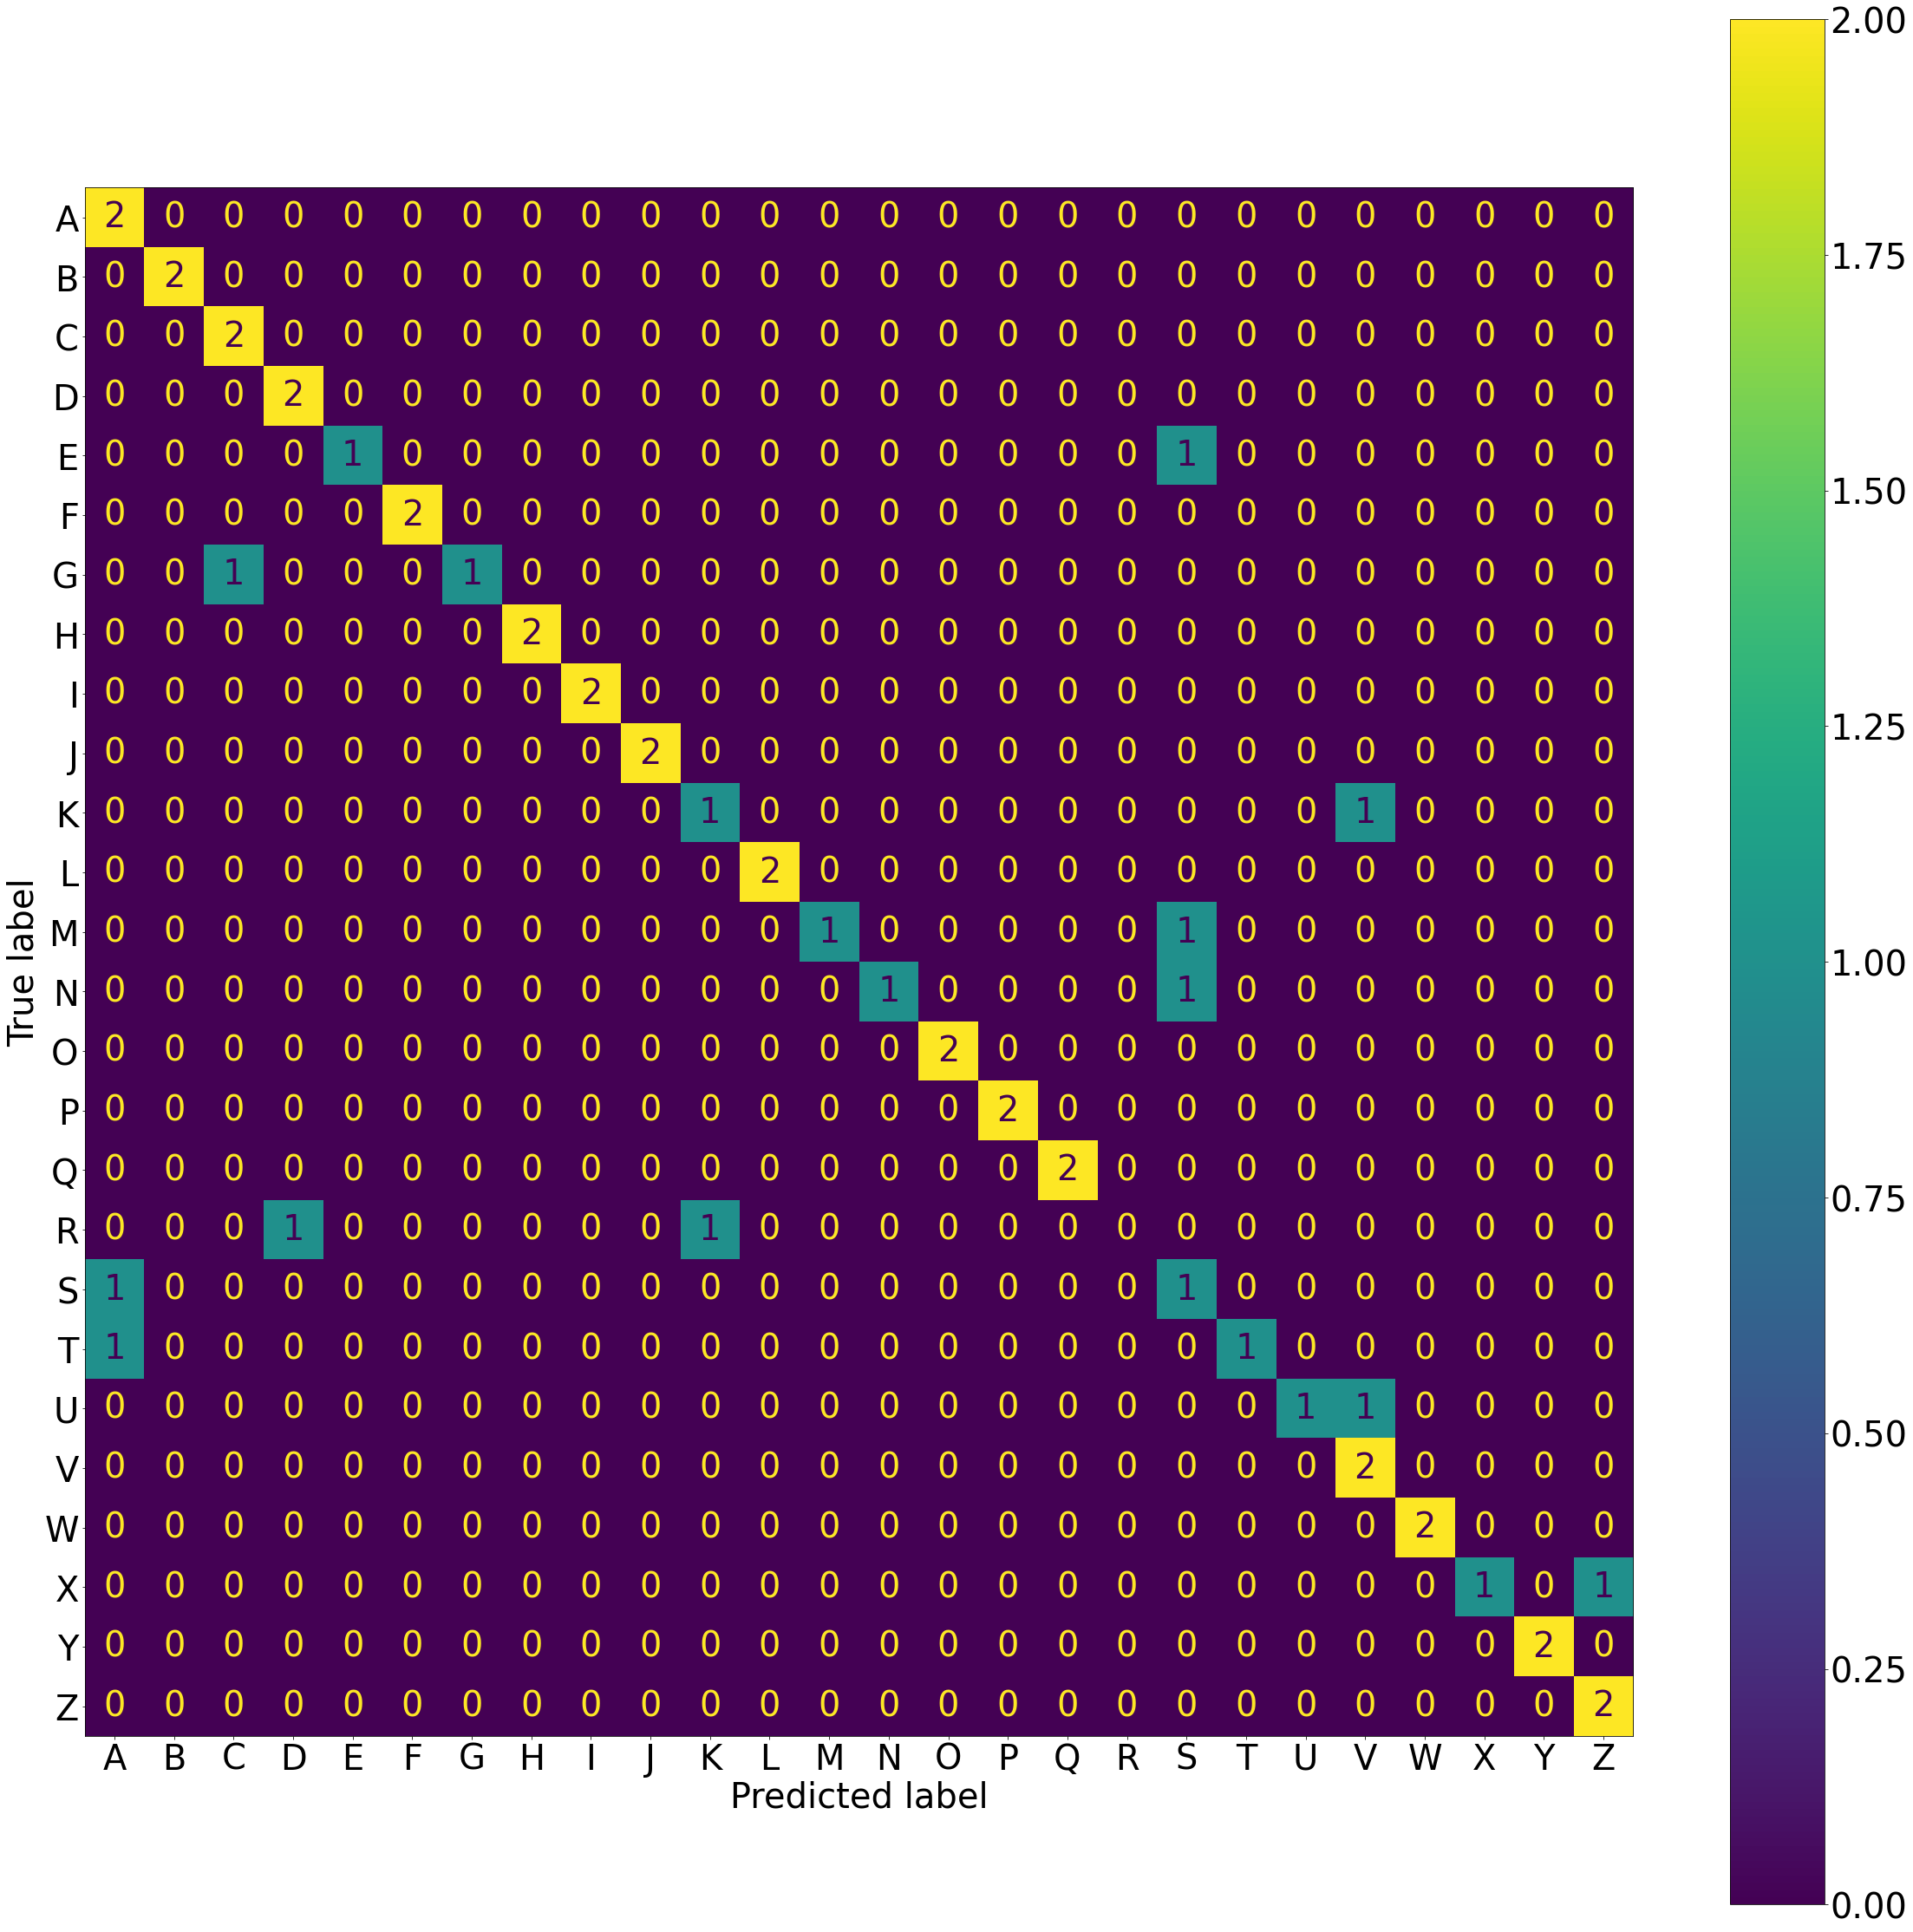

In [ ]:
plt.rc('font', size=40)
fig, ax = plt.subplots(figsize=(40,40))
disp = ConfusionMatrixDisplay(cm, display_labels=mlb.classes_)
disp = disp.plot(ax=ax)

plt.show()